**Kaggle 1차 프로젝트 가이드 코드 📝**

이 코드는 프로젝트의 방향성을 제시하기 위한 **매우 기본적인 예시**일 뿐입니다.    
정말 간단하게 들어졌으며, 현재 형태로는 **매우 초보적인 결과**를 냅니다. 😅

따라서 이 코드는 참고만 하시고, **더 나은 성능의 머신러닝 모델을 만들기 위해** 팀원들 간의 활발한 논의를 통해 **다양한 방법을 탐구해 보세요!**    
💡 여러 모델을 시도하고, 그에 맞는 최적의 접근 방식을 찾아 나가는 과정이 중요합니다. 🚀

여러분의 **창의적이고 적극적인 시도**를 통해 **더 나은 결과**를 얻기를 기대합니다! 🙌


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 데이터 열 설명

1. **id**
   - **설명**: 각 버섯 샘플의 고유 식별자입니다.
   - **유형**: 정수형(ID)

2. **class**
   - **설명**: 버섯의 독성 여부를 나타내는 타겟 변수입니다.
     - `'e'`: 식용 가능(Edible)
     - `'p'`: 독성이 있음(Poisonous)
   - **유형**: 범주형(문자열)

3. **cap-diameter**
   - **설명**: 버섯 갓의 지름을 나타냅니다.
   - **유형**: 연속형(실수형)

4. **cap-shape**
   - **설명**: 버섯 갓의 모양을 나타냅니다.
     - 예: 종형(bell), 원추형(conical), 평평한(flat) 등
   - **유형**: 범주형(문자열)

... (생략)

In [133]:
# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [134]:
print(train.head())

   id class  cap-diameter cap-shape cap-surface cap-color  \
0   0     e          8.80         f           s         u   
1   1     p          4.51         x           h         o   
2   2     e          6.94         f           s         b   
3   3     e          3.88         f           y         g   
4   4     e          5.85         x           l         w   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                    f               a            c          w  ...   
1                    f               a            c          n  ...   
2                    f               x            c          w  ...   
3                    f               s          NaN          g  ...   
4                    f               d          NaN          w  ...   

   stem-root  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0        NaN           NaN          w       NaN        NaN        f         f   
1        NaN             y          o       

In [135]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [136]:
print(train.describe())

                 id  cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116941e+06  3.116945e+06  3.116945e+06
mean   1.558472e+06  6.309848e+00  6.348333e+00  1.115379e+01
std    8.997847e+05  4.657931e+00  2.699755e+00  8.095477e+00
min    0.000000e+00  3.000000e-02  0.000000e+00  0.000000e+00
25%    7.792360e+05  3.320000e+00  4.670000e+00  4.970000e+00
50%    1.558472e+06  5.750000e+00  5.880000e+00  9.650000e+00
75%    2.337708e+06  8.240000e+00  7.410000e+00  1.563000e+01
max    3.116944e+06  8.067000e+01  8.872000e+01  1.029000e+02


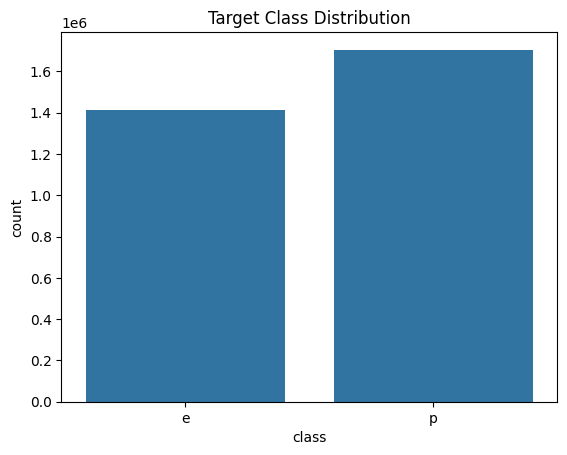

In [137]:
# 타겟 클래스 분포 시각화
sns.countplot(x='class', data=train)
plt.title('Target Class Distribution')
plt.show()

In [138]:
print(train.isnull().sum())

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


### 결측치 처리 가이드

여러분, 데이터 전처리를 할 때 결측치 처리 전략은 매우 중요합니다.    
아래 내용을 참고하여 결측치를 어떻게 다룰지 결정해 주세요.

1. **결측치가 적은 열**: `cap-diameter`, `cap-shape`, `cap-color`, `does-bruise-or-bleed`, `gill-color`, `stem-color`, `has-ring`, `habitat`, `ring-type`, `stem-height`
   - 이 열들의 결측치는 해당 열의 **최빈값**으로 채워주세요.    
   - 최빈값을 사용하는 이유는 **범주형 변수**에서 최빈값이 전체 데이터의 분포를 가장 잘 대표하기 때문에, 데이터 손실을 최소화하면서 모델의 성능을 유지할 수 있습니다.

2. **결측치가 많은 열**: `cap-surface`, `gill-attachment`, `gill-spacing`, `stem-root`, `stem-surface`, `veil-type`, `veil-color`, `spore-print-color`
   - 이 열들은 결측치가 **전체 데이터의 70% 이상**을 차지하므로, 그대로 두면 모델 성능에 큰 영향을 줄 수 있습니다. 따라서 이 열들은 **삭제하는 것**이 바람직할 수도 있습니다.
   - 하지만 만약 이 열들이 중요한 정보를 가지고 있다고 생각된다면, 다른 특성과의 관계를 분석한 후, **예측 모델**(예: 회귀 모델이나 결정 트리 등)을 사용해 결측치를 대체하는 방법도 고려해 볼 수 있습니다.     
   이를 통해 중요한 정보를 최대한 보존하면서 데이터의 품질을 유지할 수 있습니다.


위 가이드를 참고해서, 결측치 처리 방안을 결정해 주시기 바랍니다. 필요한 경우, 팀원들과 상의해서 최적의 방법을 선택해 주세요!


In [139]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 'source' 열 추가를 통해 train/test 구분 및 결합
train['source'] = 'train'
test['source'] = 'test'
test['class'] = np.nan  # test 데이터에 'class' 열 추가 (임시)
combined = pd.concat([train, test], ignore_index=True)

# 결측치 처리: 모든 열의 결측치를 최빈값으로 대체
for col in combined.columns:
    if combined[col].isnull().sum() > 0:
        mode_value = combined[col].mode()[0]  # 각 열의 최빈값 계산
        combined[col].fillna(mode_value, inplace=True)  # 최빈값으로 결측치 대체

# 범주형 변수 레이블 인코딩
label_cols = combined.select_dtypes(include='object').columns
label_encoder = LabelEncoder()

for col in label_cols:
    combined[col] = label_encoder.fit_transform(combined[col].astype(str))

# 다시 train/test 데이터 분리
train = combined[combined['source'] == label_encoder.transform(['train'])[0]].drop('source', axis=1)
test = combined[combined['source'] == label_encoder.transform(['test'])[0]].drop(['source', 'class'], axis=1)

# 독립 변수(X)와 종속 변수(y) 분리
X = train.drop(['id', 'class'], axis=1)
y = train['class']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test.drop('id', axis=1))

# 데이터 준비 완료
print("Data preparation complete.")


/var/folders/qw/mzv50j6x5rv2qzc9dhcx2b4r0000gn/T/ipykernel_18369/2855726641.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined[col].fillna(mode_value, inplace=True)  # 최빈값으로 결측치 대체


Data preparation complete.


In [140]:
# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
def monitor_progress(n_estimators, X_train, y_train):
    rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
    for i in tqdm(range(1, n_estimators + 1), desc="Training RandomForest"):
        rf.n_estimators = i  # 각 단계에서 트리의 수를 증가시킴
        rf.fit(X_train, y_train)
    return rf

# 학습 진행 상황 모니터링을 위해 설정
n_estimators = 100  # 트리 개수 설정
rf = monitor_progress(n_estimators, X_train, y_train)


Training RandomForest: 100%|██████████| 100/100 [04:13<00:00,  2.54s/it]


# 다른 모델들도 탐색해 보세요! 🔍

우리는 이 코드에서 **랜덤 포레스트(Random Forest)** 를 사용하여 모델을 학습했습니다.    
랜덤 포레스트는 여러 결정 트리를 결합하여 예측을 개선하고, 과적합을 방지하는 앙상블 기법 중 하나입니다.       
하지만, 다양한 데이터 특성과 문제에 맞게 **다른 모델들**을 탐색해 보는 것도 매우 중요합니다! 

## 추천할 만한 다른 모델들 💡

1. **로지스틱 회귀(Logistic Regression)**:
   - 이진 분류 문제에서 자주 사용되는 선형 모델입니다.     
     해석이 용이하며, 과적합을 방지하는 정규화를 적용할 수 있습니다.

2. **서포트 벡터 머신(SVM, Support Vector Machine)**:
   - 고차원 공간에서 데이터를 분리하는 경계를 찾는 모델입니다.     
     커널 트릭을 이용하여 비선형 문제에도 적용할 수 있습니다.

3. **K-최근접 이웃(K-Nearest Neighbors, KNN)**:
   - 인접한 데이터 포인트의 다수를 기반으로 예측을 수행합니다.      
     간단하면서도 효과적인 비모수적 모델입니다.

4. **결정 트리(Decision Tree)**:
   - 규칙 기반의 모델로, 직관적이고 시각화가 쉬워 설명력이 뛰어납니다.      
     하지만 단일 결정 트리는 과적합될 수 있기 때문에 주의가 필요합니다.

5. **그레이디언트 부스팅(Gradient Boosting)**:
   - 앙상블 학습의 일종으로, 연속적으로 모델을 학습하여 예측 성능을 개선합니다.     
     XGBoost, LightGBM, CatBoost와 같은 다양한 구현체가 있습니다.

6. **신경망(Neural Networks)**:
   - 딥러닝 모델로, 복잡한 데이터와 비선형 문제를 다룰 수 있는 강력한 모델입니다.     
     많은 데이터와 계산 리소스가 필요하지만, 이미지나 텍스트와 같은 복잡한 데이터에서 뛰어난 성능을 보입니다.

## 하이퍼파라미터 튜닝과 다른 방안도 고려하세요! 🔧

모델 성능을 최대한으로 끌어올리기 위해서는 단순히 모델을 변경하는 것뿐만 아니라, **하이퍼파라미터 튜닝**도 중요합니다. 

### 하이퍼파라미터 튜닝의 예시:

- **n_estimators**: 트리의 개수
- **max_depth**: 트리의 최대 깊이
- **min_samples_split**: 노드를 분할하기 위한 최소 샘플 수
- **learning_rate** (그레이디언트 부스팅의 경우): 학습 속도를 조절하는 파라미터

이 외에도 교차 검증, 특성 선택, 데이터 전처리 기법 등을 조합하여 최적의 성능을 도출하는 방법을 탐구해 보세요!     
여러분의 팀원들과 함께 다양한 시도를 통해 최고의 결과를 만들어가시기 바랍니다. 🚀



In [142]:
# 검증 데이터에 대한 예측
y_pred = rf.predict(X_val)

# 검증 데이터 성능 평가
print("Validation Results:")
print(classification_report(y_val, y_pred))
print('Validation Accuracy:', accuracy_score(y_val, y_pred))


Validation Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Validation Accuracy: 0.9913970249715667


정확도는 99%에 달하지만, 실제로는 매우 낮은 정확도를 보일 것입니다.   
이유는 데이터 전처리를 진행하면서 결측치를 전부 최빈값으로 무작정 채운 결과 데이터가 손상되었기 때문입니다.

Feature Importances:
1. stem-width: 0.1318
2. cap-surface: 0.0855
3. cap-diameter: 0.0798
4. gill-attachment: 0.0781
5. stem-color: 0.0768
6. gill-color: 0.0726
7. stem-height: 0.0709
8. stem-surface: 0.0609
9. gill-spacing: 0.0550
10. cap-color: 0.0500
11. cap-shape: 0.0498
12. ring-type: 0.0419
13. does-bruise-or-bleed: 0.0302
14. habitat: 0.0295
15. stem-root: 0.0278
16. has-ring: 0.0238
17. spore-print-color: 0.0122
18. veil-color: 0.0120
19. season: 0.0114
20. veil-type: 0.0000


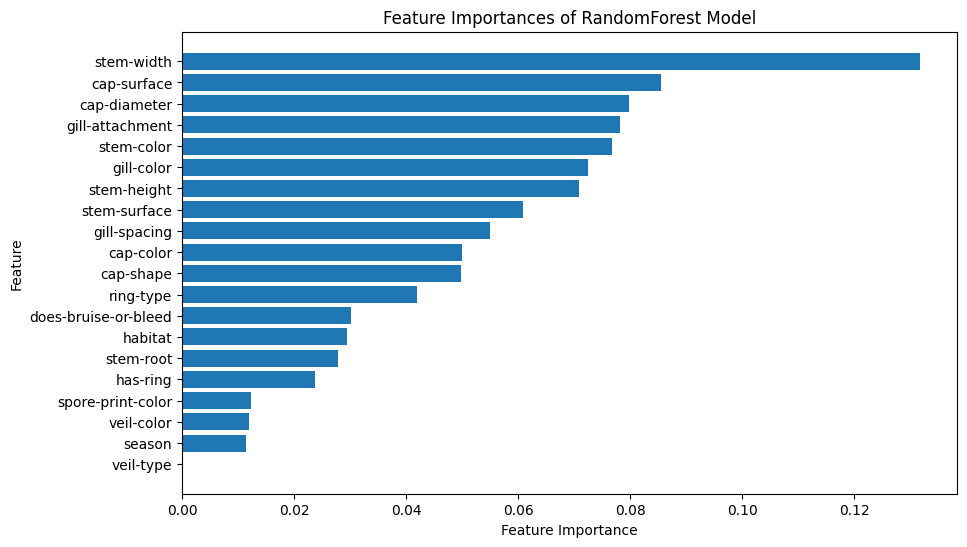

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 특성 중요도 추출
feature_importances = rf.feature_importances_

# combined 데이터프레임에서 열 이름 가져오기
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    # 원래 데이터프레임에서 열 이름 가져오기 (combined에서 'id'와 'class' 제외)
    feature_names = combined.drop(['id', 'class'], axis=1).columns

# 특성 중요도를 내림차순으로 정렬하고 인덱스 가져오기
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

# 특성 중요도 출력
print("Feature Importances:")
for i, feature in enumerate(sorted_features):
    print(f"{i + 1}. {feature}: {feature_importances[sorted_idx[i]]:.4f}")

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances of RandomForest Model")
plt.gca().invert_yaxis()  # 가장 중요한 특성이 위에 오도록 반전
plt.show()


In [144]:
# 테스트 데이터에 대한 예측 수행
test_predictions = rf.predict(test_scaled)

# 제출 파일 생성
submission = pd.DataFrame({'id': test['id'], 'class': test_predictions})
submission['class'] = submission['class'].map({0: 'e', 1: 'p'})  # 'class' 열을 원래 문자형으로 변환

# 제출 파일을 CSV로 저장
submission.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")


/Users/forwarder1121/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Submission file created: 'submission.csv'
